# UFO Casus

In [53]:
# data analyse bibliotheken
import numpy as np
import pandas as pd
from datetime import datetime
import scipy as sp
from scipy import stats

# visualisatie bibliotheken
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
dataUfo = pd.read_csv("datasets/ufo.csv",
                index_col = 0)
dataUfo.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,visit (seconds)
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,255
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,307
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,280
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,202
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,255


In [55]:
dataPop = pd.read_csv('datasets/population.csv',
                index_col = 0)
dataPop.head()

,population
year,
1610,350
1620,2302
1630,4646
1640,26634
1650,50368


## Data cleaning

In [66]:
print ("Heeft de Ufo dataset missende waarden? ", dataUfo.isnull().values.any(), '\n')
print ("Heeft de Population dataset missende waarden? ", dataPop.isnull().values.any(), '\n')

Heeft de Ufo dataset missende waarden?  True 

Heeft de Population dataset missende waarden?  False 



In [57]:
pd.set_option('display.max_rows', None)
dataUfo.isnull().sum()
pd.reset_option("display.max_rows")

In [58]:
print ("In totaal missen er ", dataUfo.isnull().sum().sum(), " gegevens." '\n')

In totaal missen er  25752  gegevens.



In [59]:
drop_list = ['visit (seconds)', 'duration (seconds)', 'comments', 'duration (hours/min)', 'date posted']
dataUfo.drop(drop_list, axis = 1, inplace = True)
dataUfo

,datetime,city,state,country,shape,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,21.4180556,-157.803611
...,...,...,...,...,...,...,...
88674,9/9/2013 22:00,napa,ca,us,other,38.2972,-122.284444
88675,9/9/2013 22:20,vienna,va,us,circle,38.9011,-77.265556
88676,9/9/2013 23:00,edmond,ok,us,cigar,35.6528,-97.477778
88677,9/9/2013 23:00,starr,sc,us,diamond,34.3769,-82.695833


In [60]:
dataUfo.dropna(inplace = True)
dataUfo

,datetime,city,state,country,shape,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,29.8830556,-97.941111
3,10/10/1956 21:00,edna,tx,us,circle,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,36.5950000,-82.188889
7,10/10/1965 23:45,norwalk,ct,us,disk,41.1175000,-73.408333
...,...,...,...,...,...,...,...
88674,9/9/2013 22:00,napa,ca,us,other,38.2972,-122.284444
88675,9/9/2013 22:20,vienna,va,us,circle,38.9011,-77.265556
88676,9/9/2013 23:00,edmond,ok,us,cigar,35.6528,-97.477778
88677,9/9/2013 23:00,starr,sc,us,diamond,34.3769,-82.695833


In [61]:
print ("In totaal missen er ", dataUfo.isnull().sum().sum(), " gegevens." '\n')

In totaal missen er  0  gegevens.



In [62]:
dataUfo.dtypes

datetime      object
city          object
state         object
country       object
shape         object
latitude      object
longitude    float64
dtype: object

In [63]:
dataUfo = dataUfo.astype({'city': 'category',
                        'state': 'category',
                        'country': 'category',
                        'shape': 'category',
                        'latitude': float,
                        'longitude': float
                       })
dataUfo['datetime'] = pd.to_datetime(dataUfo['datetime'],
                                    format="%m/%d/%Y %H:%M",
                                   errors='coerce')
dataUfo.dtypes

datetime     datetime64[ns]
city               category
state              category
country            category
shape              category
latitude            float64
longitude           float64
dtype: object

### Opgeschoond dataframepie ufo's

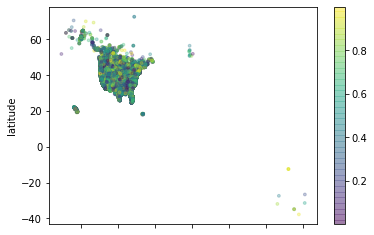

In [64]:
rng = np.random.RandomState(0)
colors = rng.rand(71279)
sizes = 10 * rng.rand()

dataUfo.plot.scatter(x='longitude', y='latitude', c=colors, s=sizes, alpha=0.3, cmap='viridis')



### USA population en jaartal vanaf 1940

In [65]:
dataPop = dataPop[dataPop['year'] >= 1940]
dataPop

KeyError: 'year'

#### Visualiseren

In [ ]:
ax = dataPop.plot(x='year', y='population')
ax.set_xlabel('Jaartal')
ax.set_ylabel('Bevolking in hondermiljoenen')



## Wat is het verband tussen het aantal waarnemingen per 1000 inwoners in de VS en het jaartal?

In [ ]:
dataUfo = dataUfo[dataUfo.country == 'us']
dataUfo.plot.scatter(x='longitude', y='latitude')